In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

dfS2 = pd.read_csv('https://media.githubusercontent.com/media/joaoascensao/S-L-REL606-BarSeq/master/E_F/data/bc_counts/FS2_counts.csv')
r_totS2 = pd.read_csv('https://media.githubusercontent.com/media/joaoascensao/S-L-REL606-BarSeq/master/E_F/data/bc_counts/FS2_Rtot.csv')

gene_index = []
for gene in dfS2["gene_ID"]:
    gene_index.append(gene)
#df.index = gene_index
dfS2.dropna(subset = ["gene_ID"], inplace = True)
dfS2 = dfS2.reset_index() 

all_genes = [] #list of all gene_IDs
for gene in gene_index:
    if gene != "NaN" and gene != "nan" and gene not in all_genes:
        all_genes.append(gene)
all_genes.pop(0)
print(len(all_genes))
print(len(dfS2))

r_totS2 = r_totS2.iloc[: , 1:]
dfS2.head()


3462
205801


,index,barcode,0_1,0_2,1,2,3,4,strand,pos,gene_ID,type,gene_symbol,description
0,34,GACTGGACTCTGACTACAAA,13,35,34,0,12,0,-,263938.0,ECB_00238,cds,phoE,outer membrane phosphoporin protein E
1,35,CCTAAGCGCTTACCCCAACC,42,116,10,53,10,23,+,2881032.0,ECB_02693,cds,yqeG,predicted transporter
2,36,TCGGACCCAGCTTGGAATAA,48,107,104,69,52,91,+,4065973.0,ECB_03781,cds,yiiG,hypothetical protein
3,37,TACCTCGGTCAAGGCGTCTA,8,35,32,32,20,0,-,2824332.0,ECB_02648,cds,NaN,L-fuculose phosphate aldolase
4,40,TATGATTCACCTCTTTATAC,21,32,31,25,16,13,-,1790824.0,ECB_01700,cds,cedA,cell division modulator


In [3]:
all_dfs = {} #dictionary of gene_ID to corresponding dataframe
for gene in all_genes:            
    all_dfs[gene] = dfS2[dfS2.gene_ID == gene] 

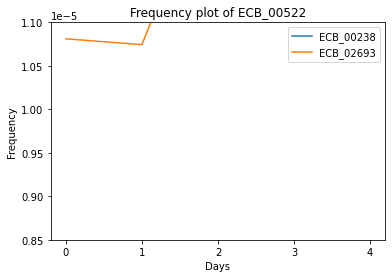

In [4]:
RtotS2_dict = dict(zip(r_totS2.columns.values, r_totS2.iloc[0].values))

#days
days = [0, 1, 2, 3, 4]

#function that takes the frequency average of a column (for a certain day)
def avg_freq(df, day, Rtot_dict):
    freq_vals = [] #all frequency values
    for count in df[day]:
        freq = count/Rtot_dict[day]
        freq_vals.append(freq)
    avg = np.sum(freq_vals)/len(freq_vals) #avg of all frequency values
    return avg
    
#function that yields average frequency of all barcodes in a single gene over 5 days (0-4 days)
def freq_over_days(df, Rtot_dict):
    all_freqs = []
    for day in ["0_1","0_2","1","2","3","4"]:
        all_freqs.append(avg_freq(df, day, Rtot_dict))
    day0 = (all_freqs[0]+all_freqs[1])/2
    all_freqs.pop(0)
    all_freqs.pop(0)
    all_freqs.insert(0, day0)
    #print(all_freqs)
    return all_freqs

def plot_freq(freq_array, gene):
    days = [0, 1, 2, 3, 4]
    plt.plot(days, freq_array, label = gene)
    plt.xticks(np.arange(0,len(days),1))
    plt.ylim([0.85e-5,1.1e-5])
    plt.xlabel("Days")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title("Frequency plot of ECB_00522")
    
plot_freq(freq_over_days(all_dfs["ECB_00238"], RtotS2_dict),"ECB_00238")
plot_freq(freq_over_days(all_dfs["ECB_02693"], RtotS2_dict), "ECB_02693")

In [5]:
#discard of counts under an average of 30
def discard(df):
    to_discard = []
    for i in range(len(df)):
        sum = 0
        for day in ["0_1","0_2","1","2","3","4"]:
            sum += df.loc[i,day] 
        if sum/6 < 30: #average count across days is < 30 --> discard
            to_discard.append(i)
    return to_discard

dfS2_dropped = dfS2.copy()

dfS2_dropped.drop(labels=discard(dfS2), axis=0, inplace=True)
print(len(discard(dfS2)))
dfS2_dropped = dfS2_dropped.reset_index() 
print(len(dfS2_dropped))
dfS2_dropped.head(50)

147062
58739


,level_0,index,barcode,0_1,0_2,1,2,3,4,strand,pos,gene_ID,type,gene_symbol,description
0,1,35,CCTAAGCGCTTACCCCAACC,42,116,10,53,10,23,+,2881032.0,ECB_02693,cds,yqeG,predicted transporter
1,2,36,TCGGACCCAGCTTGGAATAA,48,107,104,69,52,91,+,4065973.0,ECB_03781,cds,yiiG,hypothetical protein
2,5,43,CAGTCCCGGCCCCGCTGCGC,32,78,39,14,4,31,-,4316271.0,ECB_03987,cds,adiY,DNA-binding transcriptional activator
3,6,44,ATTCCTGTTACTAGATCAAA,34,97,29,26,24,30,+,1468609.0,ECB_01382,cds,NaN,hypothetical protein
4,7,46,CCCCCCAGGCTCGTGACGCC,65,61,61,45,51,53,-,2392940.0,ECB_02257,cds,yfcO,hypothetical protein
5,9,49,GCCACAGCACCGGTCACACT,42,53,39,73,12,33,-,4437424.0,ECB_04099,cds,yjfF,predicted sugar transporter subunit
6,11,52,AAAATTAATTAGTCGCACGA,17,43,24,34,48,19,-,791672.0,ECB_00732,cds,NaN,conserved hypothetical protein
7,13,54,CACGGTCGGGCCTCGGTGCC,28,49,51,33,52,28,+,2709384.0,ECB_02542,cds,ygaG,S-ribosylhomocysteinase
8,14,55,TTACCGACTACTCACATTGA,43,53,59,31,11,17,-,3789895.0,ECB_03531,cds,NaN,hypothetical protein
9,15,56,CGAACCCTCCGACGCGCTTT,7,46,33,29,36,36,-,3119814.0,ECB_02915,cds,ygiL,predicted fimbrial-like adhesin protein


In [6]:
#dictionary with days and corresponding Rtot
RtotS2_dict = dict(zip(r_totS2.columns.values, r_totS2.iloc[0].values))

dfS2_freqs = dfS2_dropped.copy() #df with freqs of all days

def frequency(df_freqs, rtot):
    for day in ["0_1","0_2","1","2","3","4"]:
        freq_vals = [] #all frequency values
        for count in df_freqs[day]:
            freq = count/rtot[day]
            freq_vals.append(freq)
        df_freqs["%s_freq" % day] = freq_vals
    df_freqs.insert(15, "0_freq", df_freqs[["0_1_freq", "0_2_freq"]].mean(axis=1))
    
frequency(dfS2_freqs, RtotS2_dict)
dfS2_freqs.head(50)

,level_0,index,barcode,0_1,0_2,1,2,3,4,strand,...,type,gene_symbol,description,0_freq,0_1_freq,0_2_freq,1_freq,2_freq,3_freq,4_freq
0,1,35,CCTAAGCGCTTACCCCAACC,42,116,10,53,10,23,+,...,cds,yqeG,predicted transporter,0.000008,4.366829e-06,0.000011,9.339890e-07,0.000005,1.102269e-06,0.000003
1,2,36,TCGGACCCAGCTTGGAATAA,48,107,104,69,52,91,+,...,cds,yiiG,hypothetical protein,0.000007,4.990662e-06,0.000010,9.713486e-06,0.000007,5.731797e-06,0.000014
2,5,43,CAGTCCCGGCCCCGCTGCGC,32,78,39,14,4,31,-,...,cds,adiY,DNA-binding transcriptional activator,0.000005,3.327108e-06,0.000007,3.642557e-06,0.000001,4.409075e-07,0.000005
3,6,44,ATTCCTGTTACTAGATCAAA,34,97,29,26,24,30,+,...,cds,NaN,hypothetical protein,0.000006,3.535052e-06,0.000009,2.708568e-06,0.000003,2.645445e-06,0.000004
4,7,46,CCCCCCAGGCTCGTGACGCC,65,61,61,45,51,53,-,...,cds,yfcO,hypothetical protein,0.000006,6.758188e-06,0.000006,5.697333e-06,0.000004,5.621570e-06,0.000008
5,9,49,GCCACAGCACCGGTCACACT,42,53,39,73,12,33,-,...,cds,yjfF,predicted sugar transporter subunit,0.000005,4.366829e-06,0.000005,3.642557e-06,0.000007,1.322722e-06,0.000005
6,11,52,AAAATTAATTAGTCGCACGA,17,43,24,34,48,19,-,...,cds,NaN,conserved hypothetical protein,0.000003,1.767526e-06,0.000004,2.241574e-06,0.000003,5.290890e-06,0.000003
7,13,54,CACGGTCGGGCCTCGGTGCC,28,49,51,33,52,28,+,...,cds,ygaG,S-ribosylhomocysteinase,0.000004,2.911219e-06,0.000005,4.763344e-06,0.000003,5.731797e-06,0.000004
8,14,55,TTACCGACTACTCACATTGA,43,53,59,31,11,17,-,...,cds,NaN,hypothetical protein,0.000005,4.470801e-06,0.000005,5.510535e-06,0.000003,1.212496e-06,0.000003
9,15,56,CGAACCCTCCGACGCGCTTT,7,46,33,29,36,36,-,...,cds,ygiL,predicted fimbrial-like adhesin protein,0.000002,7.278048e-07,0.000004,3.082164e-06,0.000003,3.968167e-06,0.000005


In [7]:
dfS2_x = dfS2_freqs.copy() #df with freqs of VST (variance stabilizing transformation)

def x_freq(df_x):
    for freq in ["0_freq","1_freq","2_freq","3_freq","4_freq"]:
        x_vals = [] #all frequency values
        for count in df_x[freq]:
            count = np.sqrt(count)
            x_vals.append(count)
        df_x["x(%s)" % freq] = x_vals

df_S2 = x_freq(dfS2_x)  
dfS2_x = dfS2_x.drop(dfS2_x.columns[[0, 1, 3, 4, 5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21]], axis=1)
dfS2_x.head(50)

,barcode,strand,pos,gene_ID,type,gene_symbol,description,x(0_freq),x(1_freq),x(2_freq),x(3_freq),x(4_freq)
0,CCTAAGCGCTTACCCCAACC,+,2881032.0,ECB_02693,cds,yqeG,predicted transporter,0.002744,0.000966,0.002286,0.001050,0.001849
1,TCGGACCCAGCTTGGAATAA,+,4065973.0,ECB_03781,cds,yiiG,hypothetical protein,0.002725,0.003117,0.002609,0.002394,0.003678
2,CAGTCCCGGCCCCGCTGCGC,-,4316271.0,ECB_03987,cds,adiY,DNA-binding transcriptional activator,0.002293,0.001909,0.001175,0.000664,0.002147
3,ATTCCTGTTACTAGATCAAA,+,1468609.0,ECB_01382,cds,NaN,hypothetical protein,0.002498,0.001646,0.001601,0.001626,0.002112
4,CCCCCCAGGCTCGTGACGCC,-,2392940.0,ECB_02257,cds,yfcO,hypothetical protein,0.002488,0.002387,0.002107,0.002371,0.002807
5,GCCACAGCACCGGTCACACT,-,4437424.0,ECB_04099,cds,yjfF,predicted sugar transporter subunit,0.002151,0.001909,0.002683,0.001150,0.002215
6,AAAATTAATTAGTCGCACGA,-,791672.0,ECB_00732,cds,NaN,conserved hypothetical protein,0.001693,0.001497,0.001831,0.002300,0.001681
7,CACGGTCGGGCCTCGGTGCC,+,2709384.0,ECB_02542,cds,ygaG,S-ribosylhomocysteinase,0.001927,0.002183,0.001804,0.002394,0.002040
8,TTACCGACTACTCACATTGA,-,3789895.0,ECB_03531,cds,NaN,hypothetical protein,0.002163,0.002347,0.001749,0.001101,0.001590
9,CGAACCCTCCGACGCGCTTT,-,3119814.0,ECB_02915,cds,ygiL,predicted fimbrial-like adhesin protein,0.001576,0.001756,0.001691,0.001992,0.002314


In [8]:
dfS2_x_corr = dfS2_x.copy() #df with corrected freqs of VST (variance stabilizing transformation)
df_s = pd.read_csv('https://media.githubusercontent.com/media/joaoascensao/S-L-REL606-BarSeq/master/E_F/data/fitness/FS2_fitness.csv')
df_t_xbar = pd.read_csv('https://media.githubusercontent.com/media/joaoascensao/S-L-REL606-BarSeq/master/E_F/data/meanfitness/FS2_xbar.csv')

df_t_xbar.head()

,Unnamed: 0,Day label,xbar,stderr,gens
0,0,1,0.010076,0.000367,6.643856
1,1,2,0.005077,0.000217,13.287712
2,2,3,0.004121,0.000169,19.931569
3,3,4,0.003196,0.000147,26.575425


In [9]:
tS2_dict = dict(zip(df_t_xbar["Day label"], df_t_xbar["gens"]))
xbarS2_dict = dict(zip(df_t_xbar["Day label"], df_t_xbar["xbar"]))
sS2_dict = dict(zip(df_s["gene_ID"], df_s["s"]))

print(tS2_dict)
print(xbarS2_dict)

{1: 6.64385619, 2: 13.28771238, 3: 19.93156857, 4: 26.57542476}
{1: 0.0100757689833971, 2: 0.0050768578645267685, 3: 0.004120548332960537, 4: 0.0031961958810918767}


In [10]:

dfS2_x_corr = dfS2_x.copy()

#dropping rows/gene_IDs with no "s" value
no_s = []
for i in range(len(dfS2_x_corr)):
    index_gene = dfS2_x_corr.columns.get_loc("gene_ID")
    if dfS2_x_corr.iloc[i,index_gene] not in sS2_dict.keys():
        no_s.append(i)
dfS2_x_corr.drop(no_s, axis=0, inplace=True)
dfS2_x_corr = dfS2_x_corr.reset_index()
dfS2_x_corr = dfS2_x_corr.drop(dfS2_x_corr.columns[[0]], axis=1)

#calculating x_corrected
days = [1, 2, 3, 4]
x_freqs = ["x(1_freq)","x(2_freq)","x(3_freq)","x(4_freq)"]

def x_corr_form(day, x, s_dict, t_dict, xbar_dict, df_x_corr):
    x_corr_vals = []
    for i in range(len(df_x_corr)):
        #index = day-1
        index_0 = df_x_corr.columns.get_loc("x(0_freq)")
        index_t = df_x_corr.columns.get_loc(x)
        x_0 = df_x_corr.iloc[i, index_0]
        x_t = df_x_corr.iloc[i, index_t]
        index_gene = df_x_corr.columns.get_loc("gene_ID")
        gene_ID = df_x_corr.iloc[i, index_gene]
        if gene_ID in s_dict.keys():
            s = s_dict[gene_ID]
        else:
            continue;
        t = t_dict[day]
        xbar = xbar_dict[day]
        x_corr = x_corr_ele(x_0, x_t, s, xbar, t)
        x_corr_vals.append(x_corr)
    return x_corr_vals
        
def x_corr_ele(x_0, x_t, s, xbar, t):
    x_corr = x_t - (x_0*math.exp((s-xbar)* (t/2)))
    return x_corr

#x_corr
for day, x in zip(days, x_freqs):
    x_corr = x_corr_form(day, x, sS2_dict, tS2_dict, xbarS2_dict, dfS2_x_corr)
    dfS2_x_corr["x_corr(%s)" % day] = x_corr
    
print(len(dfS2_x_corr))
dfS2_x_corr.head(50)

50727


,barcode,strand,pos,gene_ID,type,gene_symbol,description,x(0_freq),x(1_freq),x(2_freq),x(3_freq),x(4_freq),x_corr(1),x_corr(2),x_corr(3),x_corr(4)
0,CCTAAGCGCTTACCCCAACC,+,2881032.0,ECB_02693,cds,yqeG,predicted transporter,0.002744,0.000966,0.002286,0.001050,0.001849,-0.001696,-0.000384,-0.001610,-8.158716e-04
1,TCGGACCCAGCTTGGAATAA,+,4065973.0,ECB_03781,cds,yiiG,hypothetical protein,0.002725,0.003117,0.002609,0.002394,0.003678,0.000528,0.000067,-0.000084,1.247525e-03
2,CAGTCCCGGCCCCGCTGCGC,-,4316271.0,ECB_03987,cds,adiY,DNA-binding transcriptional activator,0.002293,0.001909,0.001175,0.000664,0.002147,-0.000295,-0.001015,-0.001497,2.616732e-06
3,CCCCCCAGGCTCGTGACGCC,-,2392940.0,ECB_02257,cds,yfcO,hypothetical protein,0.002488,0.002387,0.002107,0.002371,0.002807,-0.000011,-0.000282,0.000008,4.558821e-04
4,GCCACAGCACCGGTCACACT,-,4437424.0,ECB_04099,cds,yjfF,predicted sugar transporter subunit,0.002151,0.001909,0.002683,0.001150,0.002215,-0.000198,0.000550,-0.000994,4.612418e-05
5,CACGGTCGGGCCTCGGTGCC,+,2709384.0,ECB_02542,cds,ygaG,S-ribosylhomocysteinase,0.001927,0.002183,0.001804,0.002394,0.002040,0.000469,0.000229,0.000957,7.210813e-04
6,CGAACCCTCCGACGCGCTTT,-,3119814.0,ECB_02915,cds,ygiL,predicted fimbrial-like adhesin protein,0.001576,0.001756,0.001691,0.001992,0.002314,0.000261,0.000226,0.000566,9.170245e-04
7,CCCGACATCGCACGCAACGC,+,3584927.0,ECB_03356,cds,yhiD,predicted Mg(2+) transport ATPase inner membra...,0.002595,0.002004,0.001439,0.002394,0.002181,-0.000470,-0.000998,0.000009,-1.663410e-04
8,CCCTCACCCTATTATCTGCC,-,2364812.0,ECB_02227,cds,yfcG,predicted glutathione S-transferase,0.001915,0.001528,0.002609,0.002677,0.001590,-0.000256,0.000890,0.001033,8.853711e-06
9,GCTCGTCATTAAGATTTACT,-,3825996.0,ECB_03568,cds,yidE,hypothetical protein,0.010418,0.011447,0.013585,0.015815,0.015922,0.001419,0.003607,0.005956,6.123423e-03


In [11]:
#list of all x_corr(t) for each barcode:
xS2_corrs = dfS2_x_corr[["x_corr(1)","x_corr(2)","x_corr(3)","x_corr(4)"]].values.tolist()

def x_var(x_corrs, df_x_corr):
    x_c_var = []
    for x_c in x_corrs:
        x_var = np.var(x_c)
        x_c_var.append(x_var)
    df_x_corr["var(x_corr)"] = x_c_var

x_var(xS2_corrs, dfS2_x_corr)
dfS2_x_corr.head(50)  

,barcode,strand,pos,gene_ID,type,gene_symbol,description,x(0_freq),x(1_freq),x(2_freq),x(3_freq),x(4_freq),x_corr(1),x_corr(2),x_corr(3),x_corr(4),var(x_corr)
0,CCTAAGCGCTTACCCCAACC,+,2881032.0,ECB_02693,cds,yqeG,predicted transporter,0.002744,0.000966,0.002286,0.001050,0.001849,-0.001696,-0.000384,-0.001610,-8.158716e-04,3.014393e-07
1,TCGGACCCAGCTTGGAATAA,+,4065973.0,ECB_03781,cds,yiiG,hypothetical protein,0.002725,0.003117,0.002609,0.002394,0.003678,0.000528,0.000067,-0.000084,1.247525e-03,2.684521e-07
2,CAGTCCCGGCCCCGCTGCGC,-,4316271.0,ECB_03987,cds,adiY,DNA-binding transcriptional activator,0.002293,0.001909,0.001175,0.000664,0.002147,-0.000295,-0.001015,-0.001497,2.616732e-06,3.477285e-07
3,CCCCCCAGGCTCGTGACGCC,-,2392940.0,ECB_02257,cds,yfcO,hypothetical protein,0.002488,0.002387,0.002107,0.002371,0.002807,-0.000011,-0.000282,0.000008,4.558821e-04,7.002651e-08
4,GCCACAGCACCGGTCACACT,-,4437424.0,ECB_04099,cds,yjfF,predicted sugar transporter subunit,0.002151,0.001909,0.002683,0.001150,0.002215,-0.000198,0.000550,-0.000994,4.612418e-05,3.110987e-07
5,CACGGTCGGGCCTCGGTGCC,+,2709384.0,ECB_02542,cds,ygaG,S-ribosylhomocysteinase,0.001927,0.002183,0.001804,0.002394,0.002040,0.000469,0.000229,0.000957,7.210813e-04,7.409989e-08
6,CGAACCCTCCGACGCGCTTT,-,3119814.0,ECB_02915,cds,ygiL,predicted fimbrial-like adhesin protein,0.001576,0.001756,0.001691,0.001992,0.002314,0.000261,0.000226,0.000566,9.170245e-04,7.752767e-08
7,CCCGACATCGCACGCAACGC,+,3584927.0,ECB_03356,cds,yhiD,predicted Mg(2+) transport ATPase inner membra...,0.002595,0.002004,0.001439,0.002394,0.002181,-0.000470,-0.000998,0.000009,-1.663410e-04,1.461394e-07
8,CCCTCACCCTATTATCTGCC,-,2364812.0,ECB_02227,cds,yfcG,predicted glutathione S-transferase,0.001915,0.001528,0.002609,0.002677,0.001590,-0.000256,0.000890,0.001033,8.853711e-06,3.059357e-07
9,GCTCGTCATTAAGATTTACT,-,3825996.0,ECB_03568,cds,yidE,hypothetical protein,0.010418,0.011447,0.013585,0.015815,0.015922,0.001419,0.003607,0.005956,6.123423e-03,3.710736e-06


In [12]:
#create df with variances and corresponding geneIDs
def list_genes(df_x_corr):
    updated_genes = []
    for gene in df_x_corr["gene_ID"].tolist():
        if gene not in updated_genes:
            updated_genes.append(gene)
    return updated_genes

#getting average variance of barcodes in each gene:
def avg_var(df_x_corr):
    avg_vars = []
    std_vars = []
    for gene in list_genes(df_x_corr):
        df_gene = df_x_corr.loc[df_x_corr["gene_ID"] == gene]
        x_vars = df_gene["var(x_corr)"].mean()
        avg_vars.append(x_vars)
        x_std = np.sqrt(x_vars)
        std_vars.append(x_std)
    return [avg_vars, std_vars]

bcS2_data = {"gene_ID": list_genes(dfS2_x_corr), "avg_var(x_corr)": avg_var(dfS2_x_corr)[0], "std(x_corr)": avg_var(dfS2_x_corr)[1]}
dfS2_bc = pd.DataFrame(bcS2_data)
dfS2_bc = dfS2_bc.sort_values(by = 'avg_var(x_corr)', ascending=[False])
dfS2_bc = dfS2_bc.reset_index() 
dfS2_bc.head(50)

,index,gene_ID,avg_var(x_corr),std(x_corr)
0,1106,ECB_02732,6.855949e-06,0.002618
1,662,ECB_02593,2.893354e-06,0.001701
2,2328,ECB_03262,2.644955e-06,0.001626
3,856,ECB_04077,2.261378e-06,0.001504
4,2446,ECB_03978,2.172684e-06,0.001474
5,1181,ECB_01975,1.909077e-06,0.001382
6,2473,ECB_02302,1.671570e-06,0.001293
7,1527,ECB_02844,1.642897e-06,0.001282
8,1398,ECB_02558,1.531656e-06,0.001238
9,412,ECB_02840,1.488752e-06,0.001220


In [13]:
dfS2_bc.to_csv('FS2.csv')

In [14]:
#first 3 genes with highest variance:
def plot_x(df_gene, gene_ID):
    for i in range(len(df_gene)):
        barcode = df_gene.iloc[i,0]
        x_array = df_gene.iloc[i,8:12].tolist()
        days = [1, 2, 3, 4]
        plt.plot(days, x_array)#, label = barcode)
        plt.xticks(np.arange(1,len(days)+1,1))
        plt.xlabel("Days")
        plt.ylabel("x(t)")
        plt.ylim([-0.02,0.02])
        #plt.legend()
        plt.title(gene_ID)
    plt.show()
    
def plot_x_corr(df_gene, gene_ID):
    for i in range(len(df_gene)):
        barcode = df_gene.iloc[i,0]
        x_array = df_gene.iloc[i,12:16].tolist()
        days = [1, 2, 3, 4]
        plt.plot(days, x_array)#, label = barcode)
        plt.xticks(np.arange(1,len(days)+1,1))
        plt.xlabel("Days")
        plt.ylabel("x_corr(t)")
        plt.ylim([-0.02,0.02])
        #plt.legend()
        plt.title(gene_ID)
    plt.show()

def plot_gene_x(gene_ID, df_x_corr):
    #gene_ID = df_bc.iloc[i, 1] #1 is index of gene_ID
    df_gene = df_x_corr.loc[df_x_corr["gene_ID"] == gene_ID]
    plot_x(df_gene, gene_ID)
    
def plot_gene_x_corr(gene_ID, df_x_corr):
    #gene_ID = df_bc.iloc[i, 1] #1 is index of gene_ID
    df_gene = df_x_corr.loc[df_x_corr["gene_ID"] == gene_ID]
    plot_x_corr(df_gene, gene_ID)
    
def plot_first(df_bc, df_x_corr, n): #number of first nth genes to plot for df_bc
    gene_order = df_bc["gene_ID"].tolist()
    for gene in gene_order[0:n]:
        plot_gene_x(gene, df_x_corr)
        plot_gene_x_corr(gene, df_x_corr)
        
def plot_last(df_bc, df_x_corr, n): #number of first nth genes to plot for df_bc
    gene_order = df_bc["gene_ID"].tolist()
    for gene in gene_order[-n:]:
        plot_gene_x(gene, df_x_corr)
        plot_gene_x_corr(gene, df_x_corr)

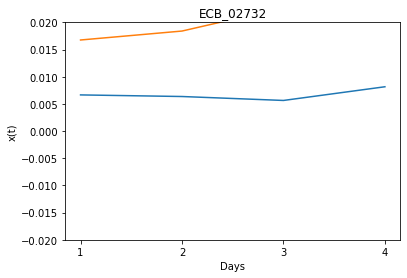

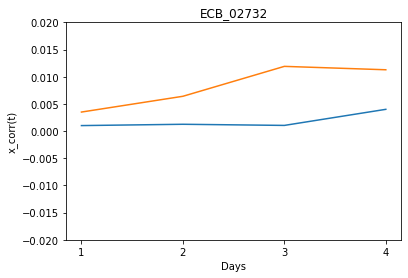

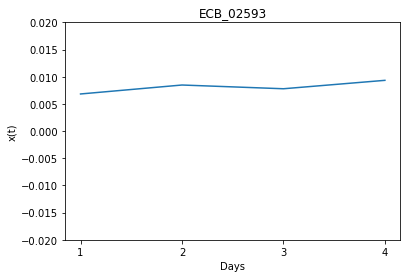

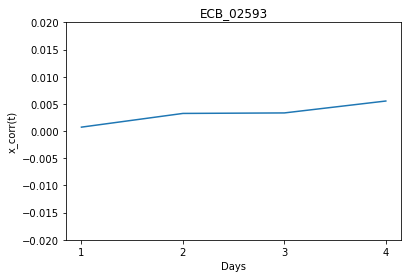

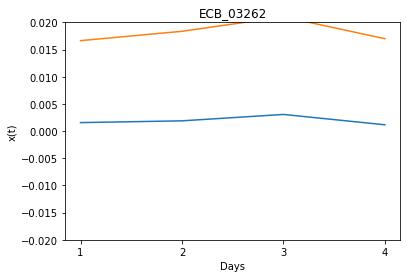

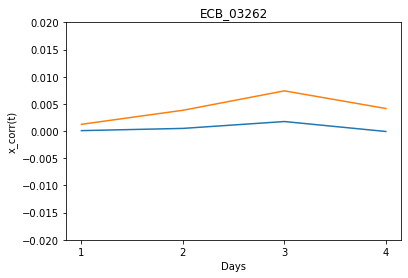

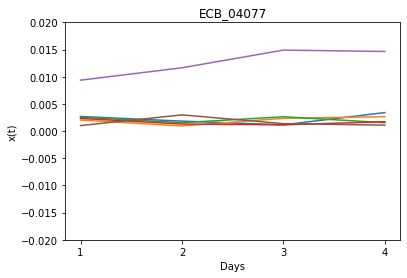

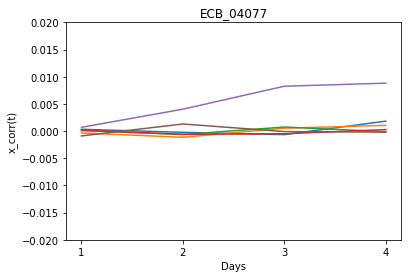

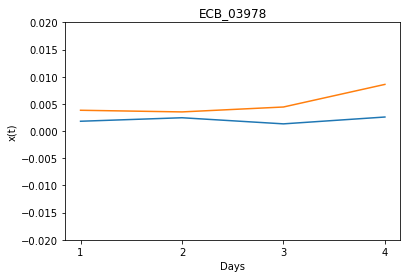

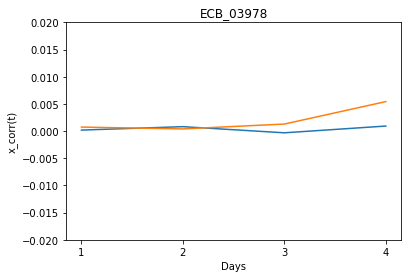

In [17]:
plot_first(dfS2_bc, dfS2_x_corr, 5)

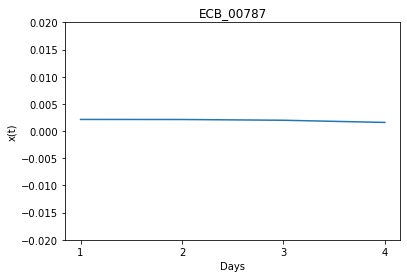

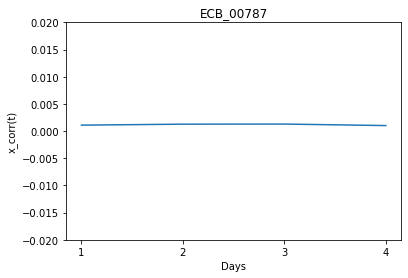

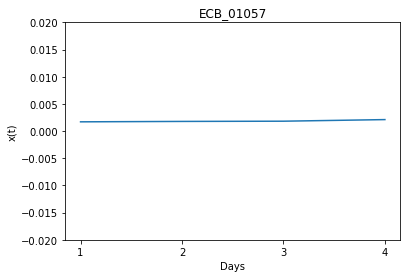

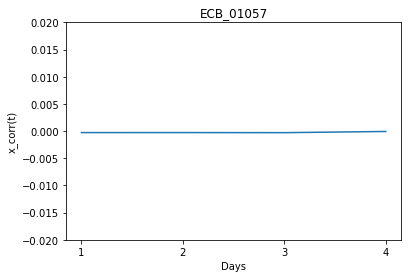

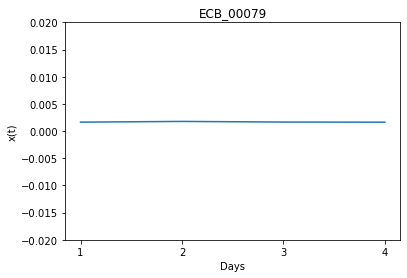

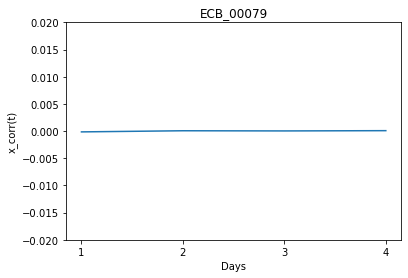

In [16]:
plot_last(dfS2_bc, dfS2_x_corr, 3)